In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn import preprocessing

In [2]:
folder_path = '../data'

file_name = 'zhelezara.csv'

In [3]:
def read_csv_file_by_location(location):
    return pd.read_csv(f'{folder_path}/{location}', parse_dates=['date_time'], index_col='date_time')

In [4]:
def plot_line_figures(df_data):
    plt.figure(figsize=(15,8))
    for elem in df_data:
        sns.lineplot(data=elem)
        
def plot_bar_figures(df_data, feature):
    plt.figure(figsize=(16, 8))

    df_index_less = df_data.reset_index()
    plotme = df_index_less.resample('Q', on='date_time').mean()
    plotme = plotme.reset_index()
    sns.barplot(y=plotme[feature], x=plotme['date_time'].dt.strftime('%b %Y'))
    plt.show()

### Read the dataset

In [5]:
dataframe = read_csv_file_by_location(file_name)

In [6]:
dataframe.head()

,sensor_id,lat,log,temperature,noise,noise_dba,pm10,humidity,pm25,relative_humidity,wind_speed,sea_level_pressure,solar_elevation_angle,solar_radiation,pressure,snow,uv,wind_direction,visibility,clouds
date_time,,,,,,,,,,,,,,,,,,,,
2017-11-09 00:30:00,7c497bfd-36b6-4eed-9172-37fd70f17c48,42.013131,21.458756,15.0,32,NaN,48,60.0,41.0,88.530175,3.000000,1020.258994,-59.974356,0.0,983.886590,0.0,0.0,268.560345,4.973889,82.897979
2017-11-09 00:45:00,7c497bfd-36b6-4eed-9172-37fd70f17c48,42.013131,21.458756,14.0,28,NaN,32,61.0,30.0,88.711540,3.000000,1020.335078,-58.274222,0.0,983.944058,0.0,0.0,269.516234,4.455556,85.877404
2017-11-09 01:00:00,7c497bfd-36b6-4eed-9172-37fd70f17c48,42.013131,21.458756,14.0,28,NaN,35,61.0,30.0,89.045302,2.990583,1020.408819,-56.484944,0.0,984.008025,0.0,0.0,270.044735,4.062778,87.062604
2017-11-09 01:15:00,7c497bfd-36b6-4eed-9172-37fd70f17c48,42.013131,21.458756,14.0,27,NaN,37,60.0,31.0,89.434486,2.912833,1020.480589,-54.048778,0.0,984.076446,0.0,0.0,270.250015,4.581111,86.890167
2017-11-09 01:30:00,7c497bfd-36b6-4eed-9172-37fd70f17c48,42.013131,21.458756,14.0,24,NaN,27,60.0,25.0,89.782750,2.834917,1020.550913,-51.607389,0.0,984.147429,0.0,0.0,270.236051,5.100556,85.793660


In [7]:
dataframe = dataframe.drop(columns=['noise_dba'])

In [8]:
columns = list(dataframe.columns)
columns

['sensor_id',
 'lat',
 'log',
 'temperature',
 'noise',
 'pm10',
 'humidity',
 'pm25',
 'relative_humidity',
 'wind_speed',
 'sea_level_pressure',
 'solar_elevation_angle',
 'solar_radiation',
 'pressure',
 'snow',
 'uv',
 'wind_direction',
 'visibility',
 'clouds']

## EDA

### Target: noise

In [9]:
predicted_feature = dataframe['noise']
predicted_feature = predicted_feature.interpolate(method='linear')

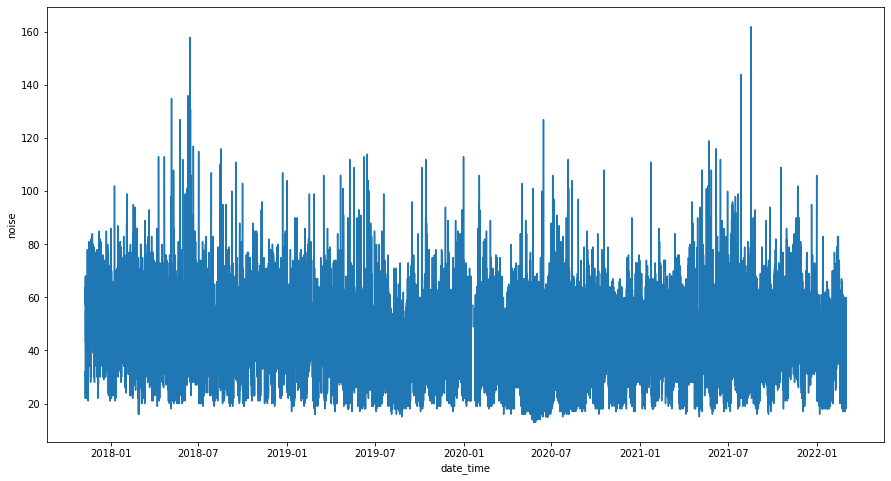

In [10]:
plot_line_figures([predicted_feature])

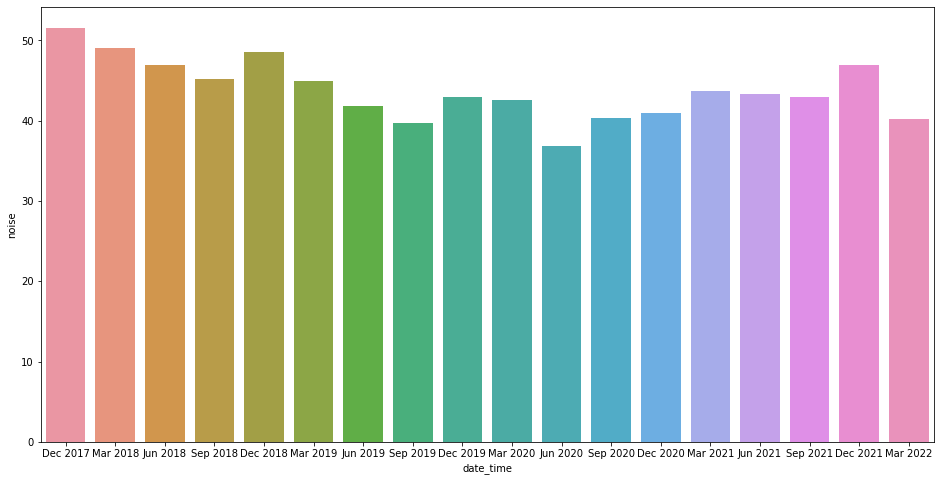

In [11]:
plot_bar_figures(predicted_feature, 'noise')

In [12]:
noise_np = predicted_feature.to_numpy()

### Temperature

In [13]:
temperature = dataframe['temperature']
temperature = temperature.interpolate(method='linear')

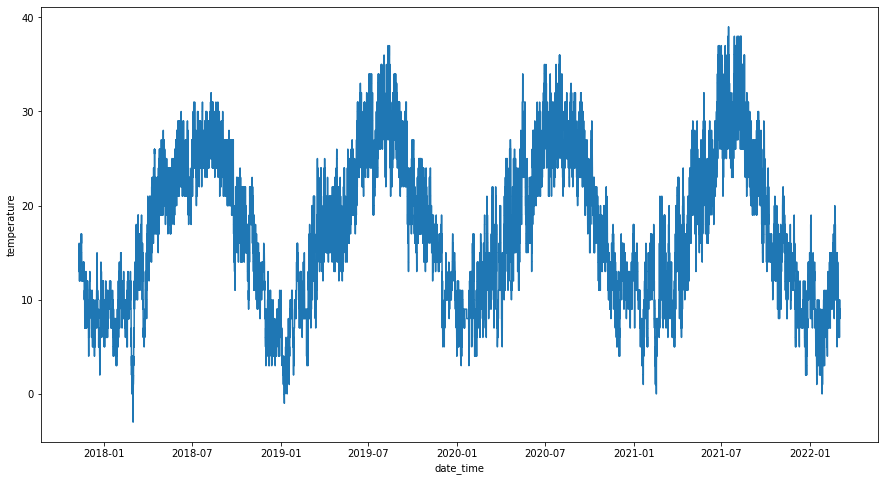

In [14]:
plot_line_figures([temperature])

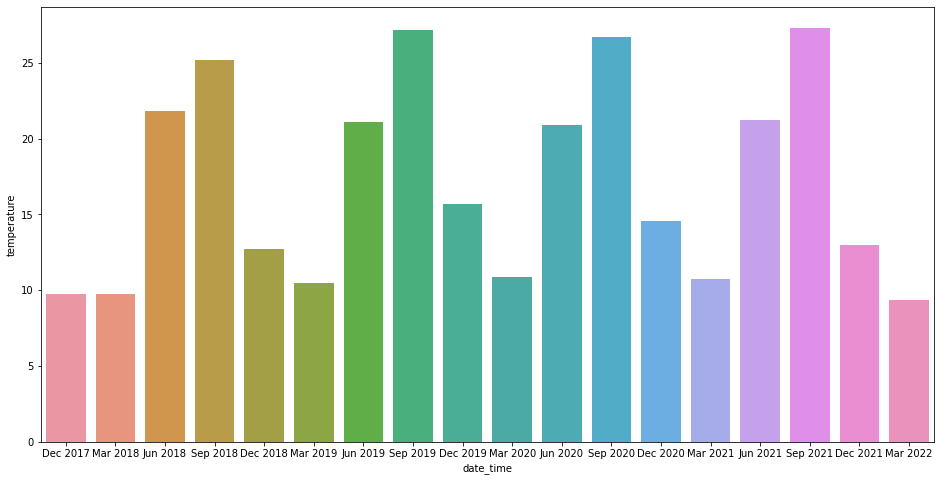

In [15]:
plot_bar_figures(temperature, 'temperature')

In [16]:
temperature_np = temperature.to_numpy()

In [17]:
pearsons_coefficient = np.corrcoef(noise_np, temperature_np)
pearsons_coefficient

array([[ 1.        , -0.01057507],
       [-0.01057507,  1.        ]])

### PM10

In [18]:
pm10 = dataframe['pm10']
pm10 = pm10.interpolate(method='linear')

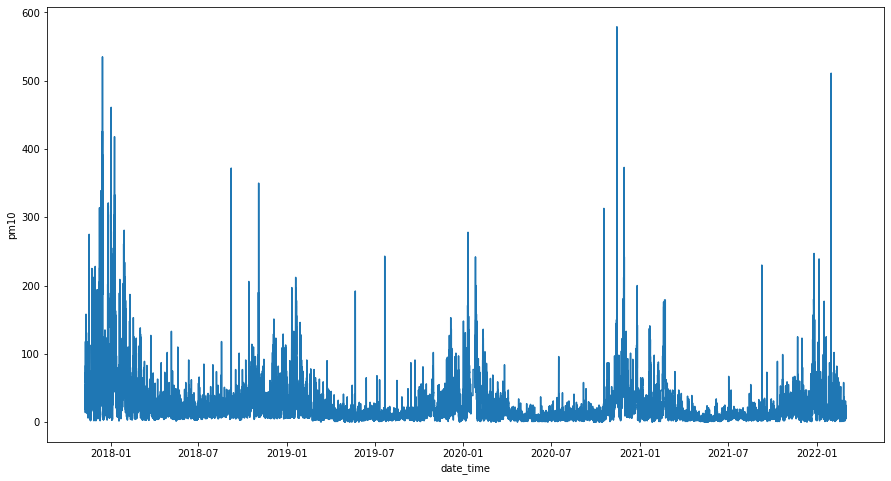

In [19]:
plot_line_figures([pm10])

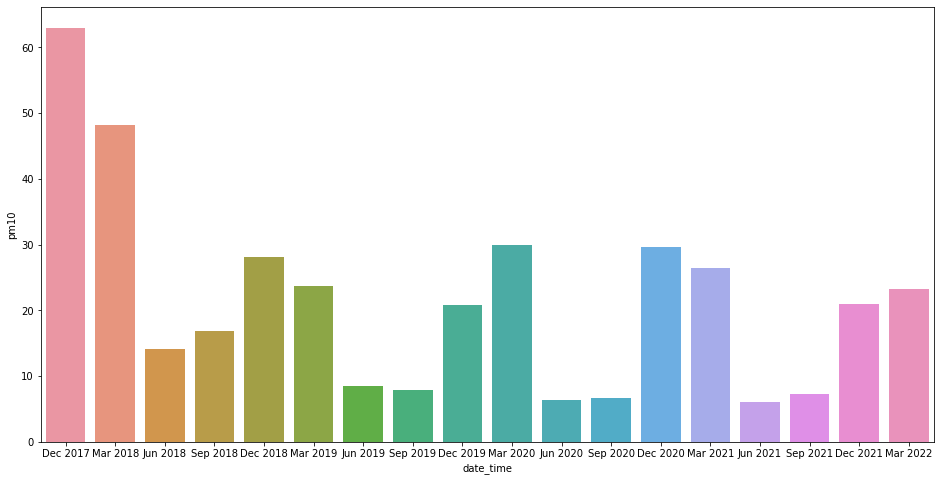

In [20]:
plot_bar_figures(pm10, 'pm10')

In [21]:
pm10_np = pm10.to_numpy()

In [22]:
pearsons_coefficient = np.corrcoef(noise_np, pm10_np)
pearsons_coefficient

array([[1.        , 0.08936105],
       [0.08936105, 1.        ]])

### Humidity

In [23]:
humidity = dataframe['humidity']
humidity = humidity.interpolate(method='linear')

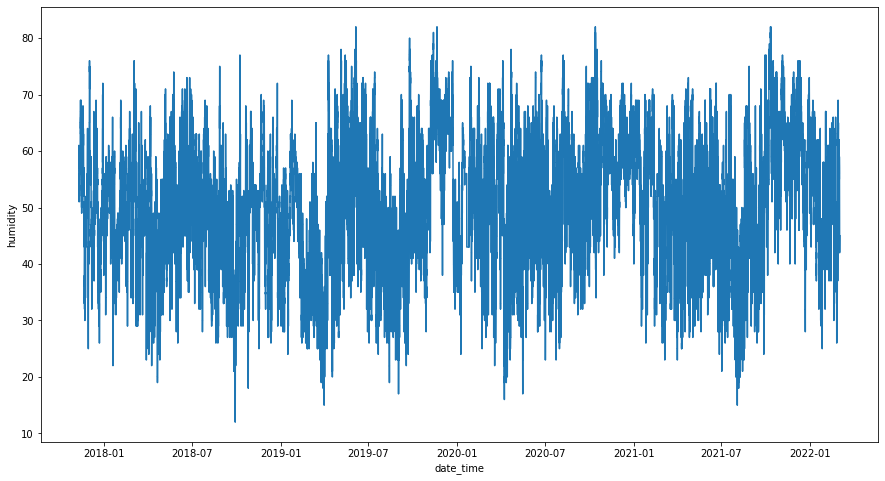

In [24]:
plot_line_figures([humidity])

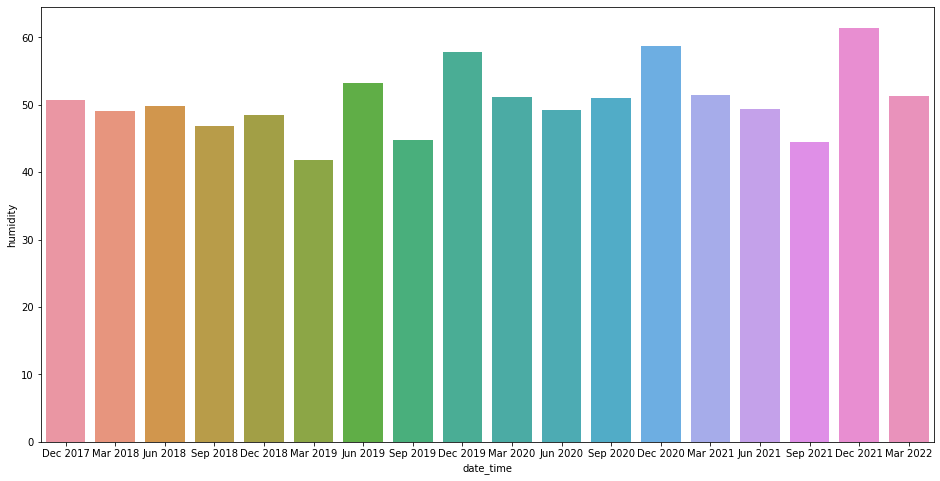

In [25]:
plot_bar_figures(humidity, 'humidity')

In [26]:
humidity_np = humidity.to_numpy()

In [27]:
pearsons_coefficient = np.corrcoef(noise_np, humidity_np)
pearsons_coefficient

array([[ 1.        , -0.16512862],
       [-0.16512862,  1.        ]])

### PM 2.5

In [28]:
pm25 = dataframe['pm25']
pm25 = pm25.interpolate(method='linear')

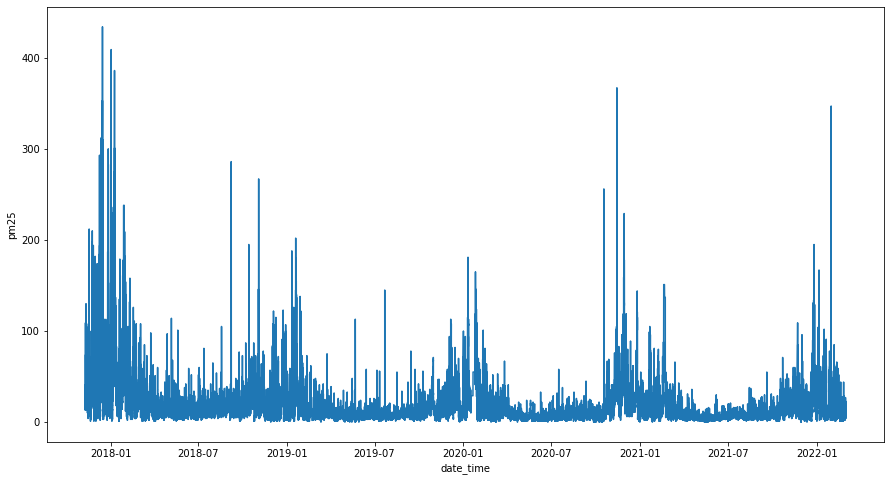

In [29]:
plot_line_figures([pm25])

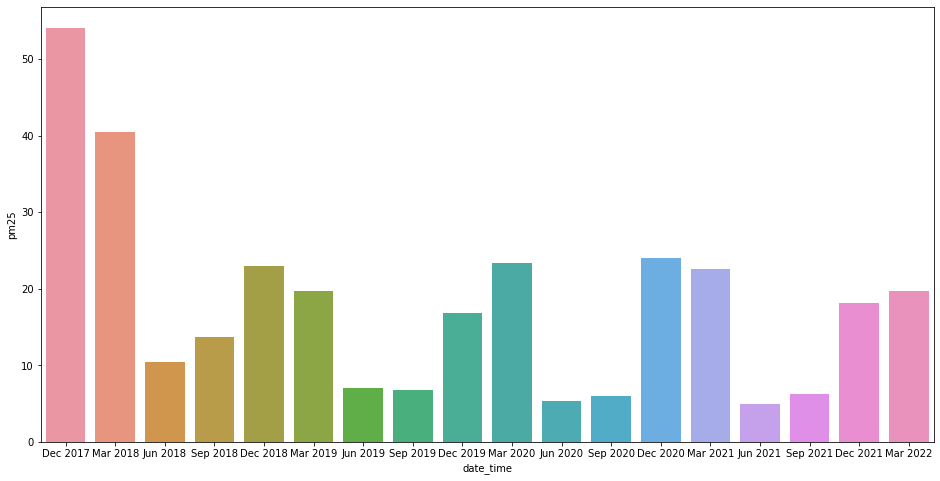

In [30]:
plot_bar_figures(pm25, 'pm25')

In [31]:
pm25_np = pm25.to_numpy()

In [32]:
pearsons_coefficient = np.corrcoef(noise_np, pm25)
pearsons_coefficient

array([[1.        , 0.08905024],
       [0.08905024, 1.        ]])

### Relative humidity

In [33]:
relative_humidity = dataframe['relative_humidity']
relative_humidity = relative_humidity.interpolate(method='linear')

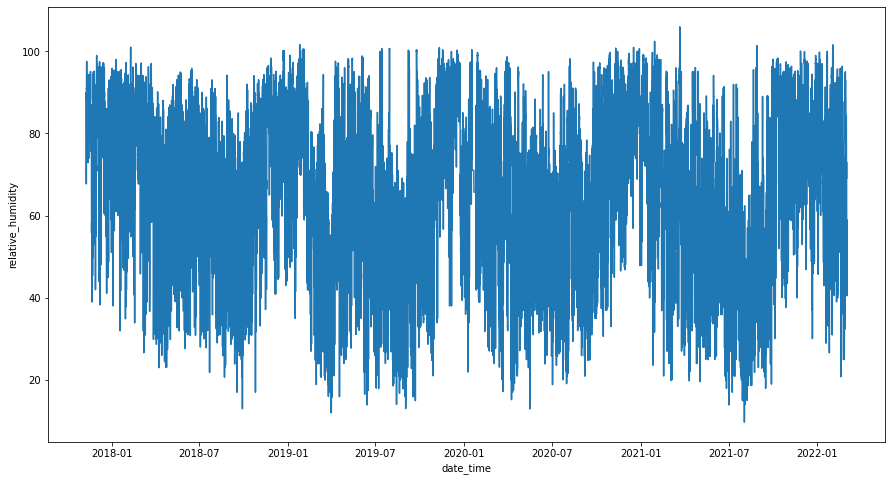

In [34]:
plot_line_figures([relative_humidity])

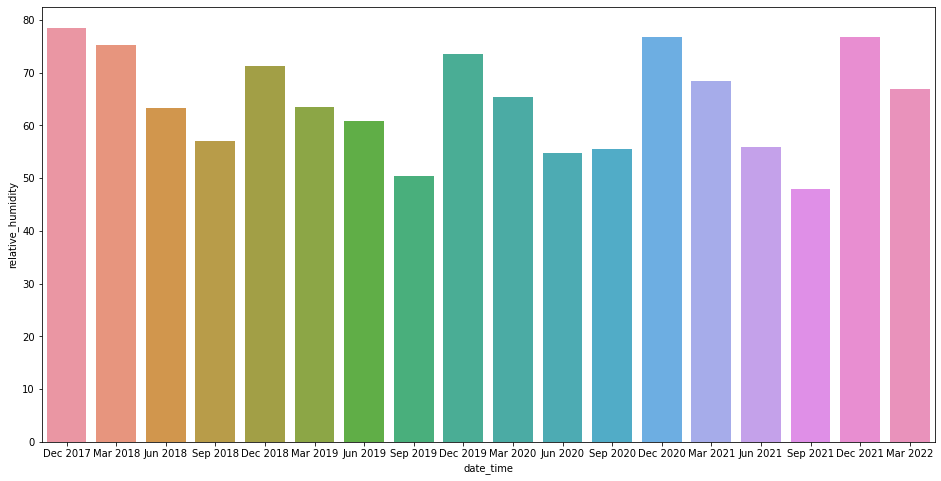

In [35]:
plot_bar_figures(relative_humidity, 'relative_humidity')

In [36]:
relative_humidity_np = relative_humidity.to_numpy()

In [37]:
pearsons_coefficient = np.corrcoef(noise_np, humidity_np)
pearsons_coefficient

array([[ 1.        , -0.16512862],
       [-0.16512862,  1.        ]])

### Wind speed

In [38]:
wind_speed = dataframe['wind_speed']
wind_speed = wind_speed.interpolate(method='linear')

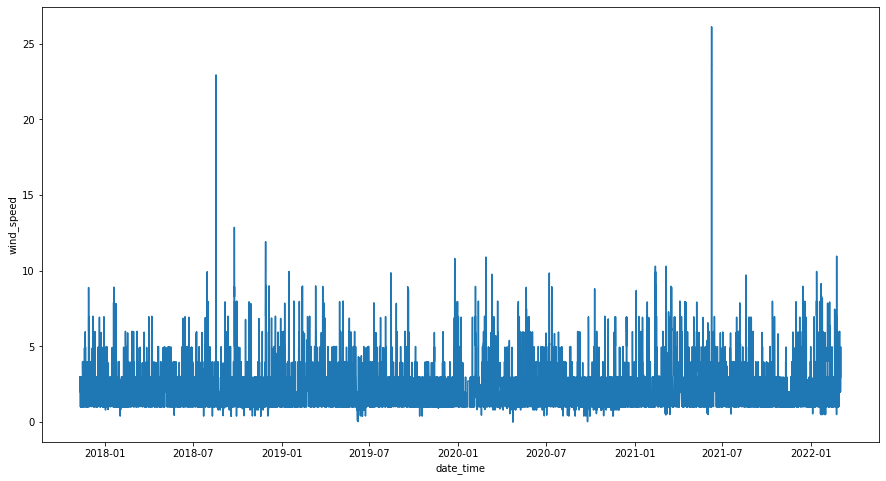

In [39]:
plot_line_figures([wind_speed])

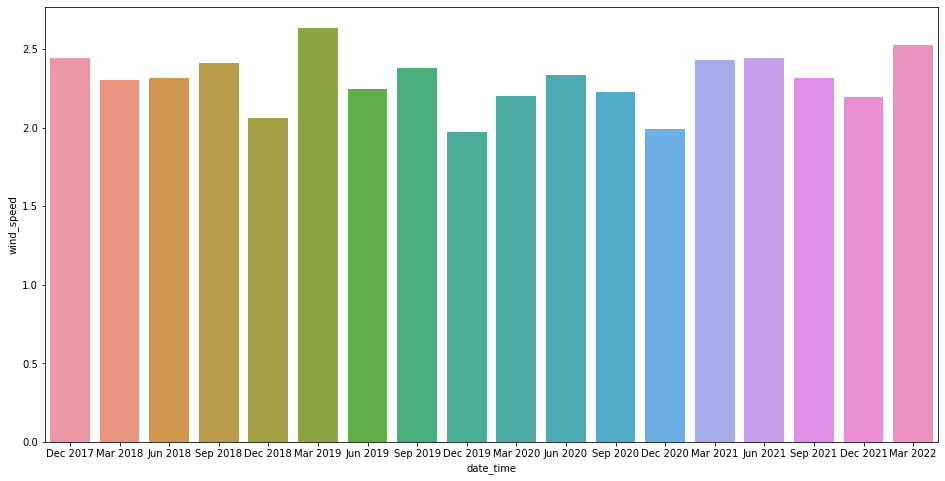

In [40]:
plot_bar_figures(wind_speed, 'wind_speed')

In [41]:
wind_speed_np = wind_speed.to_numpy()

In [42]:
pearsons_coefficient = np.corrcoef(noise_np, wind_speed_np)
pearsons_coefficient

array([[1.        , 0.04894919],
       [0.04894919, 1.        ]])

### Sea level pressure

In [43]:
sea_level_pressure = dataframe['sea_level_pressure']
sea_level_pressure = sea_level_pressure.interpolate(method='linear')

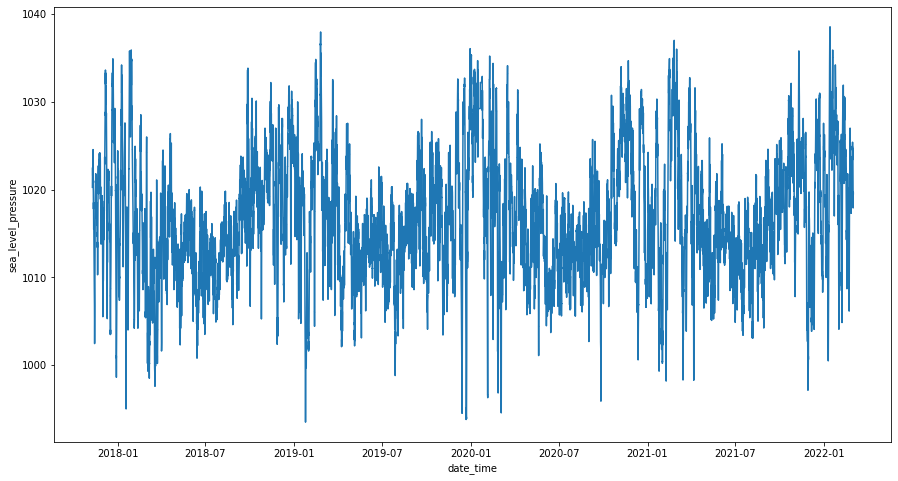

In [44]:
plot_line_figures([sea_level_pressure])

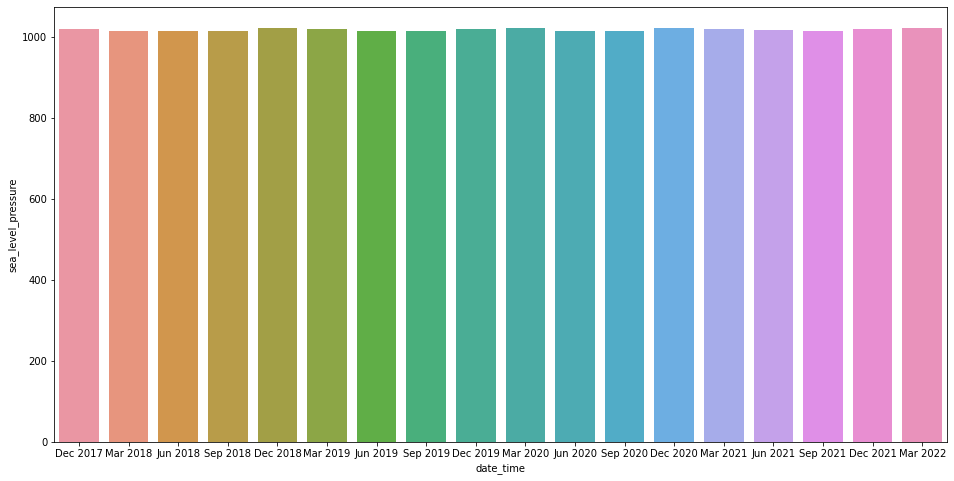

In [45]:
plot_bar_figures(sea_level_pressure, 'sea_level_pressure')

In [46]:
sea_level_pressure_np = sea_level_pressure.to_numpy()

In [47]:
pearsons_coefficient = np.corrcoef(noise_np, sea_level_pressure_np)
pearsons_coefficient

array([[ 1.        , -0.02420541],
       [-0.02420541,  1.        ]])

### Solar elevation angle

In [48]:
solar_elevation_angle = dataframe['solar_elevation_angle']
solar_elevation_angle = solar_elevation_angle.interpolate(method='linear')

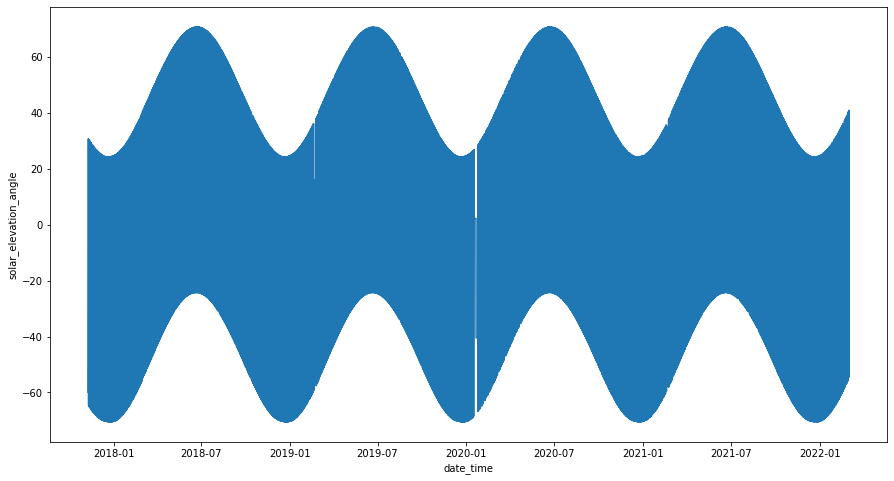

In [49]:
plot_line_figures([solar_elevation_angle])

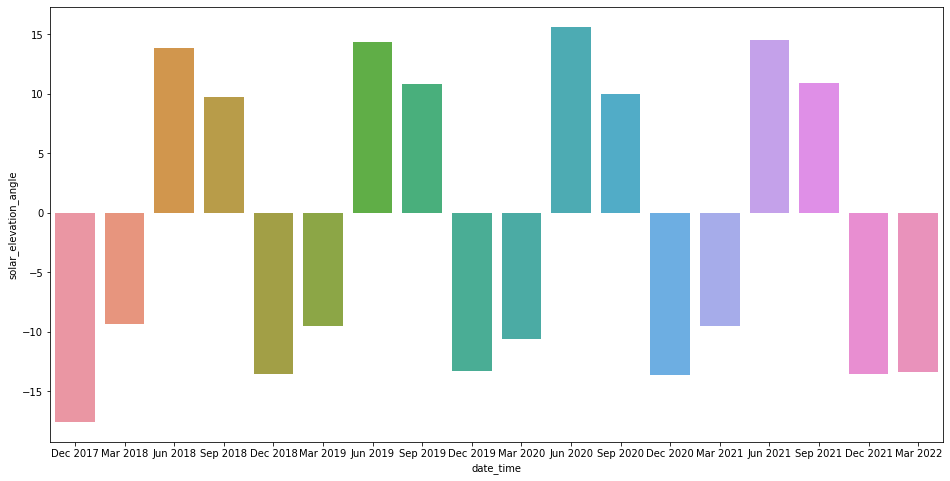

In [50]:
plot_bar_figures(solar_elevation_angle, 'solar_elevation_angle')

In [51]:
solar_elevation_angle_np = solar_elevation_angle.to_numpy()

In [52]:
pearsons_coefficient = np.corrcoef(noise_np, solar_elevation_angle_np)
pearsons_coefficient

array([[1.        , 0.36109436],
       [0.36109436, 1.        ]])

### Solar radiation

In [53]:
solar_radiation = dataframe['solar_radiation']
solar_radiation = solar_radiation.interpolate(method='linear')

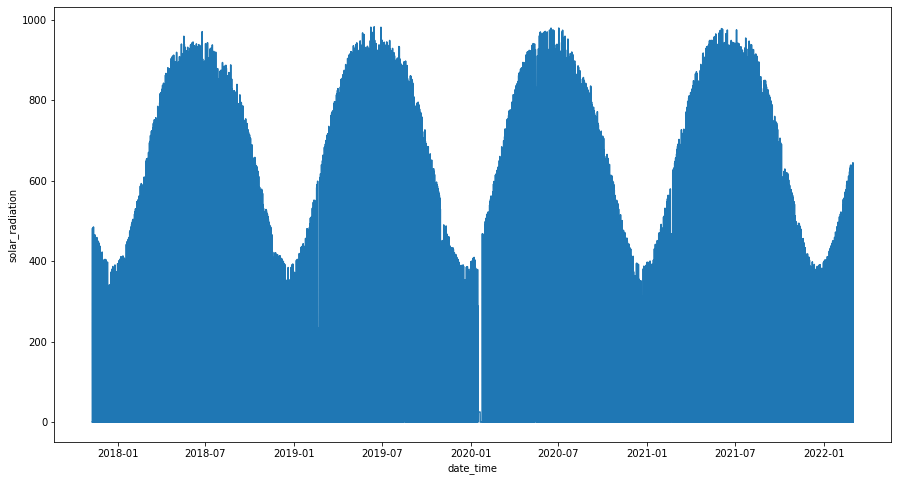

In [54]:
plot_line_figures([solar_radiation])

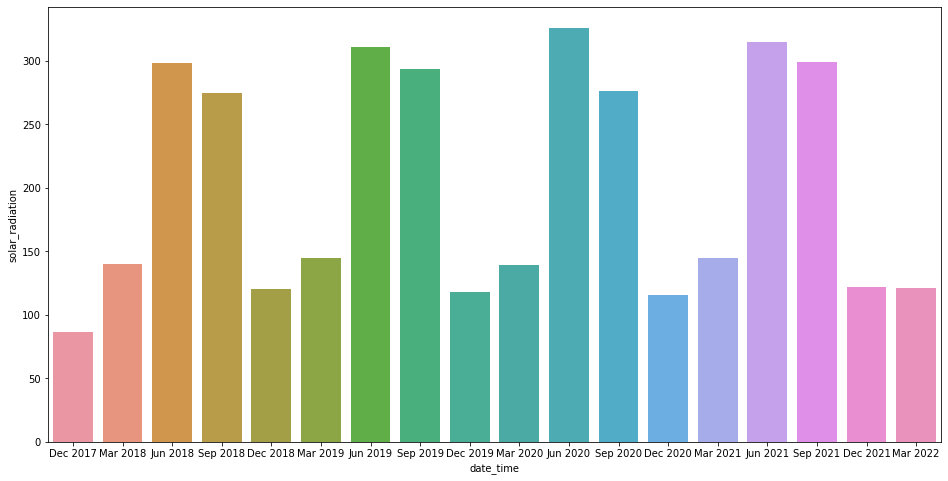

In [55]:
plot_bar_figures(solar_radiation, 'solar_radiation')

In [56]:
solar_radiation_np = solar_radiation.to_numpy()

In [57]:
pearsons_coefficient = np.corrcoef(noise_np, solar_radiation_np)
pearsons_coefficient

array([[1.        , 0.33490637],
       [0.33490637, 1.        ]])

### Pressure

In [58]:
pressure = dataframe['pressure']
pressure = pressure.interpolate(method='linear')

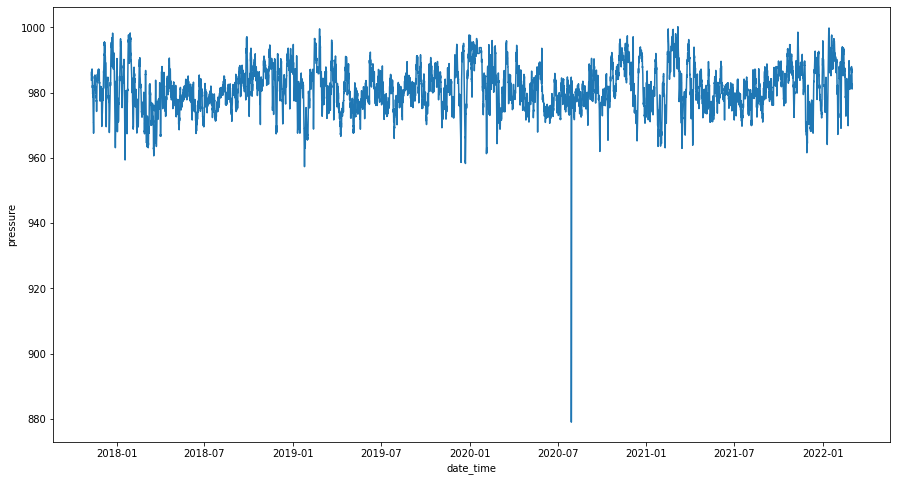

In [59]:
plot_line_figures([pressure])

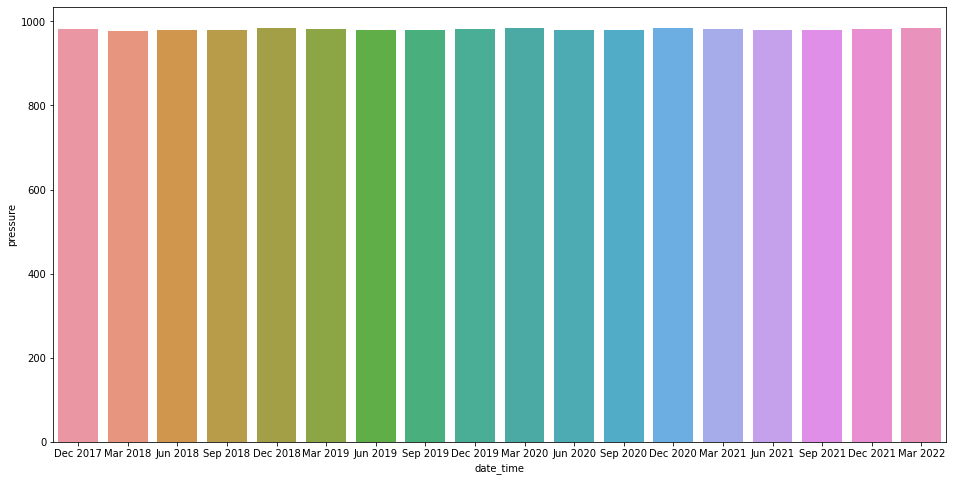

In [60]:
plot_bar_figures(pressure, 'pressure')

In [61]:
pressure_np = pressure.to_numpy()

In [62]:
pearsons_coefficient = np.corrcoef(noise_np, pressure_np)
pearsons_coefficient

array([[ 1.        , -0.01962771],
       [-0.01962771,  1.        ]])

### Snow

In [63]:
snow = dataframe['snow']
snow = snow.interpolate(method='linear')

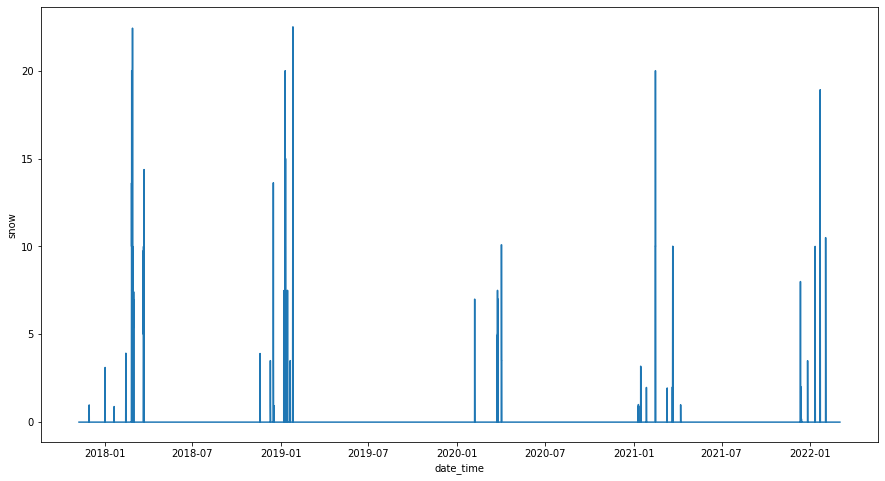

In [64]:
plot_line_figures([snow])

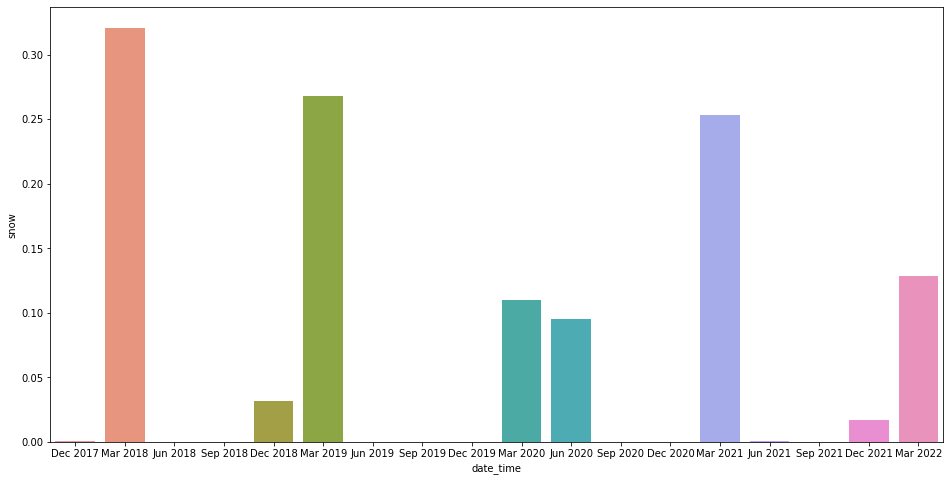

In [65]:
plot_bar_figures(snow, 'snow')

In [66]:
snow_np = snow.to_numpy()

In [67]:
pearsons_coefficient = np.corrcoef(noise_np, snow_np)
pearsons_coefficient

array([[ 1.        , -0.02369422],
       [-0.02369422,  1.        ]])

### UV

In [68]:
uv = dataframe['uv']
uv = uv.interpolate(method='linear')

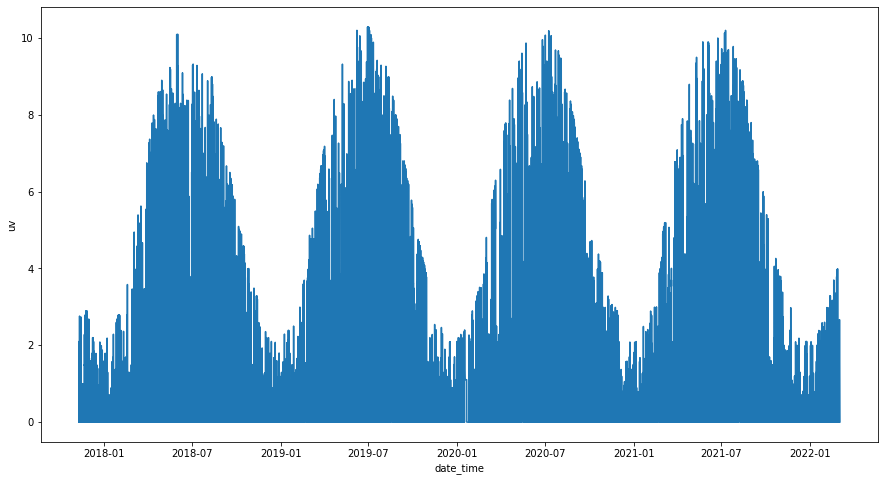

In [69]:
plot_line_figures([uv])

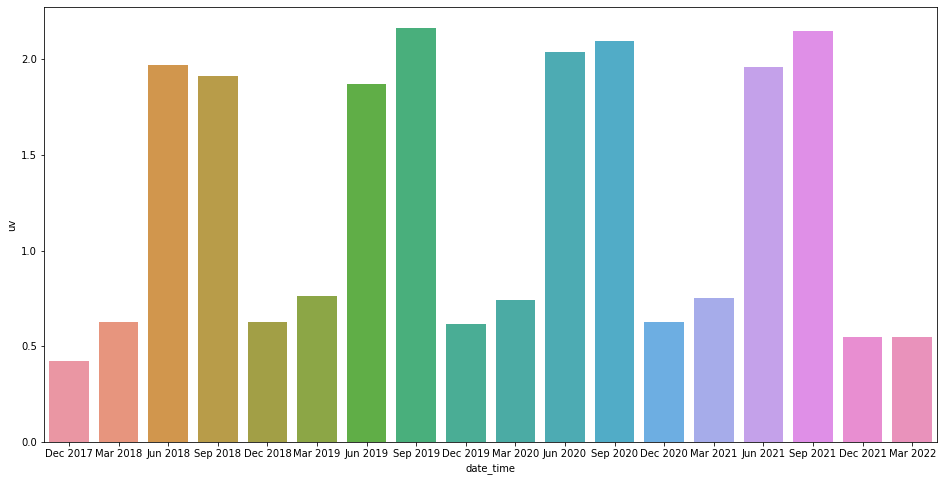

In [70]:
plot_bar_figures(uv, 'uv')

In [71]:
uv_np = uv.to_numpy()

In [72]:
pearsons_coefficient = np.corrcoef(noise_np, uv_np)
pearsons_coefficient

array([[1.        , 0.27028229],
       [0.27028229, 1.        ]])

### Wind direction

In [73]:
wind_direction = dataframe['wind_direction']
wind_direction = wind_direction.interpolate(method='linear')

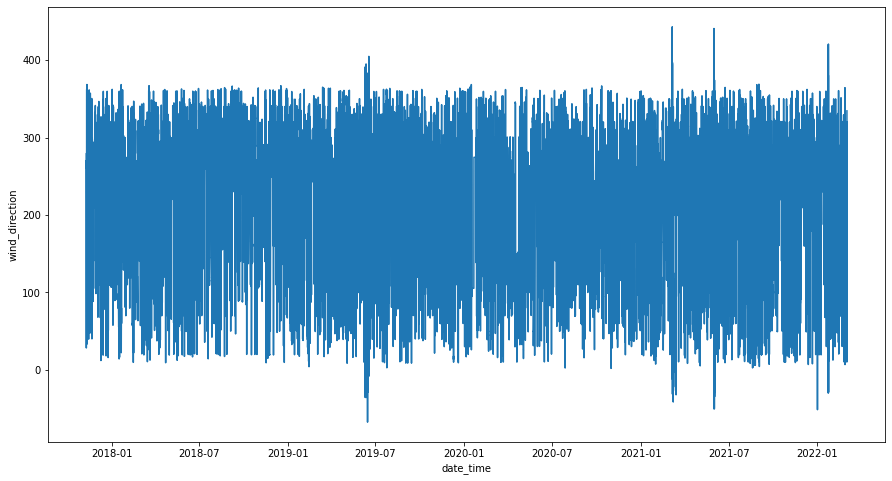

In [74]:
plot_line_figures([wind_direction])

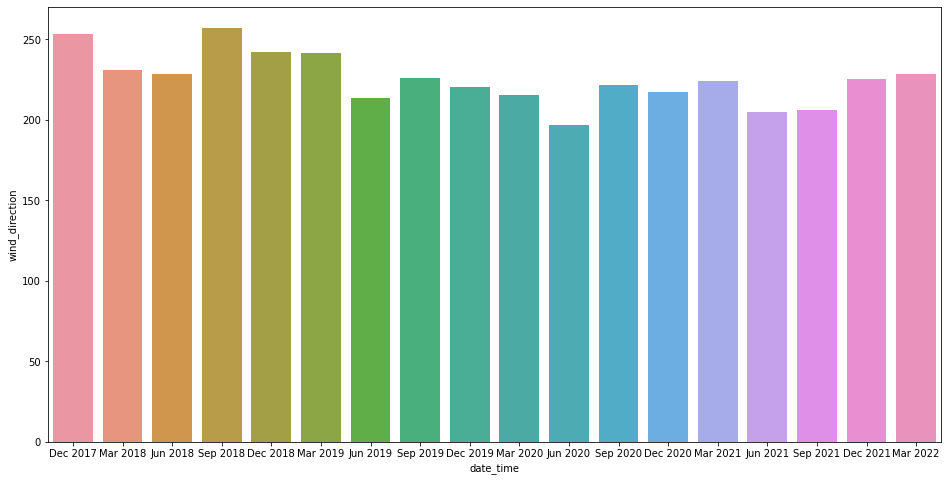

In [75]:
plot_bar_figures(wind_direction, 'wind_direction')

In [76]:
wind_direction_np = wind_direction.to_numpy()

In [77]:
pearsons_coefficient = np.corrcoef(noise_np, wind_direction_np)
pearsons_coefficient

array([[ 1.       , -0.1240029],
       [-0.1240029,  1.       ]])

### Visibility

In [78]:
visibility = dataframe['visibility']
visibility = visibility.interpolate(method='linear')

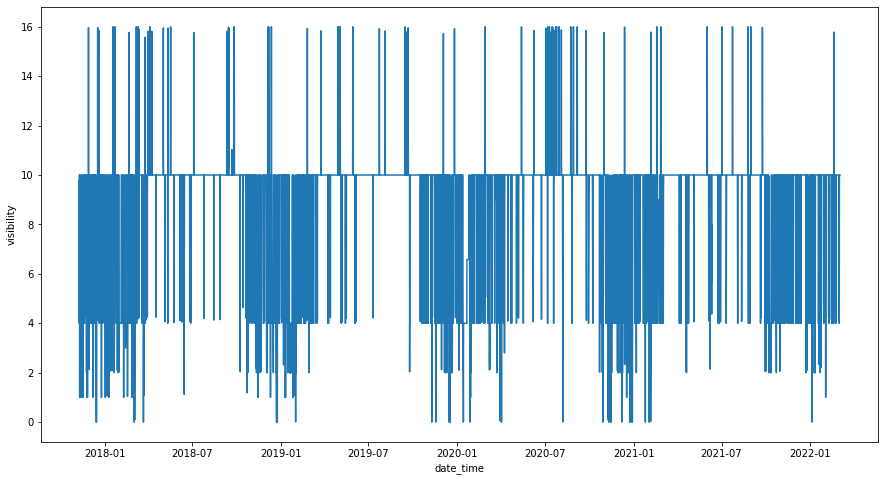

In [79]:
plot_line_figures([visibility])

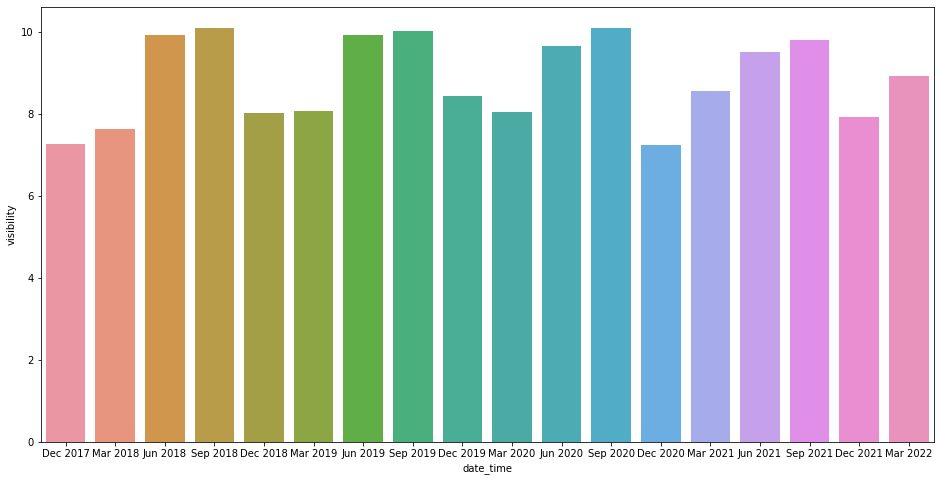

In [80]:
plot_bar_figures(visibility, 'visibility')

In [81]:
visibility_np = visibility.to_numpy()

In [82]:
pearsons_coefficient = np.corrcoef(noise_np, visibility_np)
pearsons_coefficient

array([[ 1.        , -0.13569593],
       [-0.13569593,  1.        ]])

### Clouds

In [83]:
clouds = dataframe['clouds']
clouds = clouds.interpolate(method='linear')

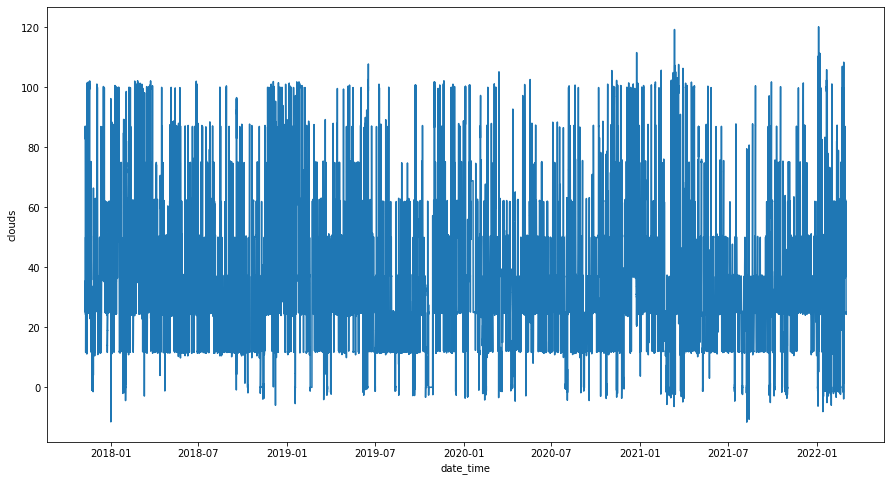

In [84]:
plot_line_figures([clouds])

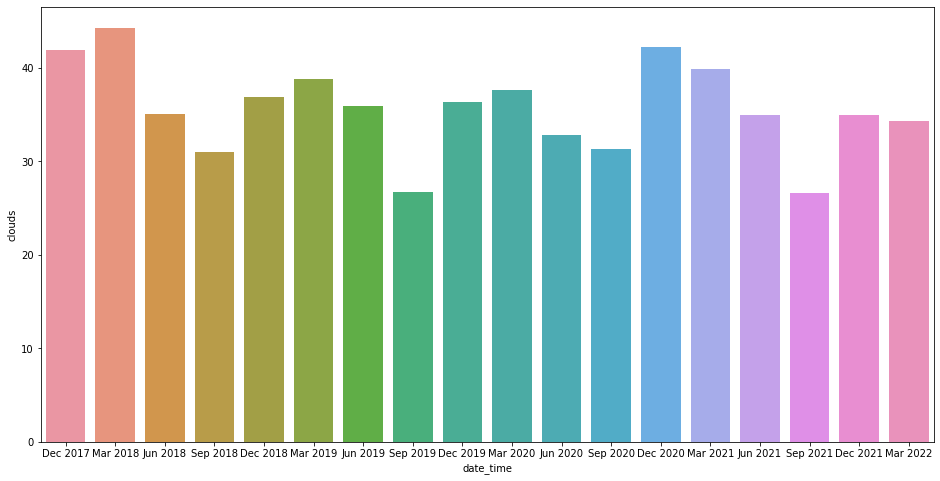

In [85]:
plot_bar_figures(clouds, 'clouds')

In [86]:
clouds_np = clouds.to_numpy()

In [87]:
pearsons_coefficient = np.corrcoef(noise_np, clouds_np)
pearsons_coefficient

array([[1.        , 0.00898688],
       [0.00898688, 1.        ]])